## Loading and preparing the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [7]:
# Loading the Amazon dataset

# Using double backslashes
df = pd.read_csv(r"D:\Docs Persos\IRONHACK_BC\labs\week _ 4 _EDA_and_inferential_stats\amz_uk_price_prediction_dataset.csv")


In [8]:
display(df.head())
print(df.shape)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


(2443651, 9)


In [9]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [10]:
list(set(df.dtypes.tolist()))

[dtype('bool'), dtype('O'), dtype('float64'), dtype('int64')]

## Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.



### 1. Crosstab Analysis:
- Create a crosstab between the product category and the isBestSeller status.
- Are there categories where being a best-seller is more prevalent?


Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [13]:
# Generating a crosstab for 'category' and the'isBestSeller' status
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [14]:
# Calculate proportions
crosstab_result['proportion_of_best_sellers'] = crosstab_result[True] / crosstab_result.sum(axis=1)

# Convert proportion to percentage
crosstab_result['proportion_of_best_sellers_percentage'] = crosstab_result['proportion_of_best_sellers'] * 100


# Sorting by proportion of best-sellers
crosstab_result_sorted = crosstab_result.sort_values(by='proportion_of_best_sellers', ascending=False)

display(crosstab_result_sorted)

isBestSeller,False,True,proportion_of_best_sellers,proportion_of_best_sellers_percentage
category,,,,
Grocery,9008,556,0.058135,5.813467
Smart Home Security & Lighting,98,6,0.057692,5.769231
Health & Personal Care,9017,552,0.057686,5.768628
Mobile Phone Accessories,248,11,0.042471,4.247104
Power & Hand Tools,8353,306,0.035339,3.533895
...,...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000,0.000000
General Music-Making Accessories,259,0,0.000000,0.000000
Snowboard Boots,1449,0,0.000000,0.000000


In [15]:
display(crosstab_result_sorted.head(10))

isBestSeller,False,True,proportion_of_best_sellers,proportion_of_best_sellers_percentage
category,,,,
Grocery,9008,556,0.058135,5.813467
Smart Home Security & Lighting,98,6,0.057692,5.769231
Health & Personal Care,9017,552,0.057686,5.768628
Mobile Phone Accessories,248,11,0.042471,4.247104
Power & Hand Tools,8353,306,0.035339,3.533895
"Billiard, Snooker & Pool",241,8,0.032129,3.212851
Pet Supplies,9152,285,0.030200,3.020028
Home Brewing & Wine Making,239,7,0.028455,2.845528
Wind Instruments,243,7,0.028000,2.800000


Are there categories where being a best-seller is more prevalent?

--> not really

### 2. Statistical Tests:

- Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
- Compute Cramér's V to understand the strength of association between best-seller status and category.

In [16]:
#TO MODIFY

from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result) #reminder: the two underscore _, _, are important !

chi2_statistic, chi2_p_value

(50740.867687015714, 0.0)

p-value = 0 --> we re ject the hypothesis that there's is no correlation between category and best-seller

In [17]:
# import
from scipy.stats.contingency import association

In [18]:
# Generating a crosstab for 'category' and the 'isBestSeller' status
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

display(crosstab_result)

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [23]:
# Convert crosstab_result DataFrame to a 2D integer array
contingency_table = crosstab_result.values

# Computing the association between variables using the "cramer" method
association_result = association(contingency_table, method="cramer")

print(association_result)

0.1222829439760564


Cramer's value is closer to 0 than to 1 leaning that we could expect there's no association between the tables

### 3. Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [24]:
# Filtering to include only rows where isBestSeller is True
crosstab_result_filtered = crosstab_result[crosstab_result.index.isin(crosstab_result[crosstab_result[True] > 0].index)]

In [25]:
display(crosstab_result_filtered)

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wearable Technology,8876,30
Wind Instruments,243,7
Window Treatments,234,5


<Axes: xlabel='category'>

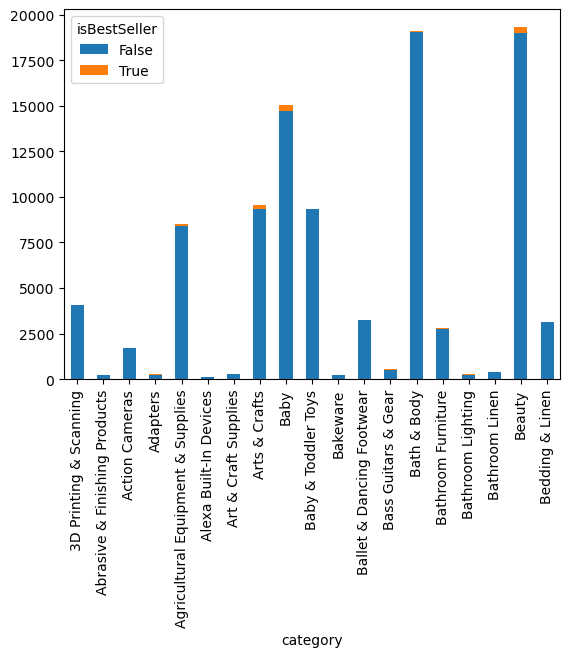

In [22]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result_filtered[1:20].plot(kind="bar", stacked=True)

<Axes: xlabel='category', ylabel='count'>

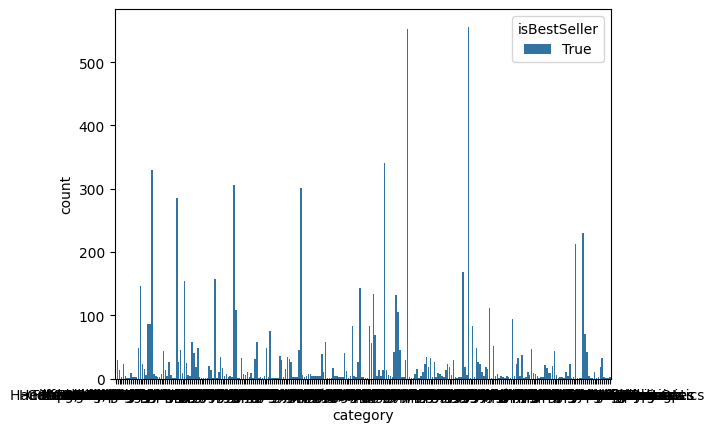

In [56]:
df_filtered = df[df['isBestSeller'] == True]

# Plotting a grouped bar chart
sns.countplot(data = df_filtered , x='category', hue='isBestSeller')

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

0. Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.



In [26]:
#Step 0: initializing our quantiles and IQR before removing our outliers

def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers


# Example usage:

'''
data_series = df['ColumnName']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)
'''

"\ndata_series = df['ColumnName']  # replace 'ColumnName' with your specific column\noutliers = tukeys_test_outliers(data_series)\nprint(outliers)\n"

In [27]:
#Step 0_bis: let's remove outliers

# Use the function to identify outliers in the 'price' column
outliers = tukeys_test_outliers(df['price'])

# Filter the DataFrame to remove outliers
df_no_outliers = df[~df['price'].isin(outliers)]

# Print or use df_no_outliers for further analysis
display(df_no_outliers)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [13]:
df_no_outliers.shape

(2115963, 9)

In [34]:
#Javier method - customized fucntion to remove outliers:

def removing_outliers(data, column):
    Q1 = data[column].quantiles(0.25)
    Q3 = data[column].quantiles(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound  = Q1 - 1.5 * IQR
    upper_bound  = Q3 + 1.5 * IQR

    # Identify the outliers
    not_outliers = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

    return not_outliers

In [36]:
removing_outliers(df, df ['price'])

KeyError: "None of [Index([ 21.99,  23.99,  21.99,  31.99,  17.99,  31.99,  21.99,  39.99,  29.99,\n        29.99,\n       ...\n       166.99,  49.99, 158.99,  14.99,  19.99,  22.34,  97.99,  52.99,  79.99,\n        53.99],\n      dtype='float64', length=2443651)] are in the [columns]"

We moved from 2443651 rows to  2115963  
--> we removed 327 688 rows = 13,41% of the rows of the dataframe

### 1. Violin Plots:

- Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
- Which product category tends to have the highest median price? Don't filter here by top categories.

<Axes: xlabel='category', ylabel='price'>

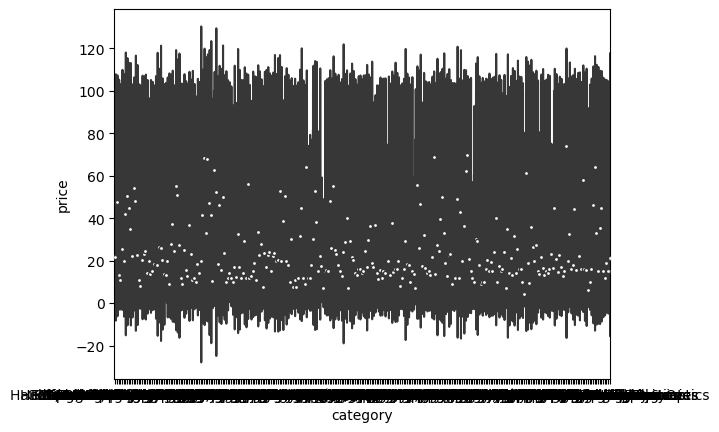

In [37]:
# Plotting a violin plot to visualize the distribution of 'price' for each 'category' category, using the "coolwarm" color palette
sns.violinplot(data=df_no_outliers, x='category', y='price', palette="coolwarm")

In [38]:
# Filter out the top 20 categories based on count
top_categories = df['category'].value_counts().nlargest(20).index
df_filtered = df[df['category'].isin(top_categories)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

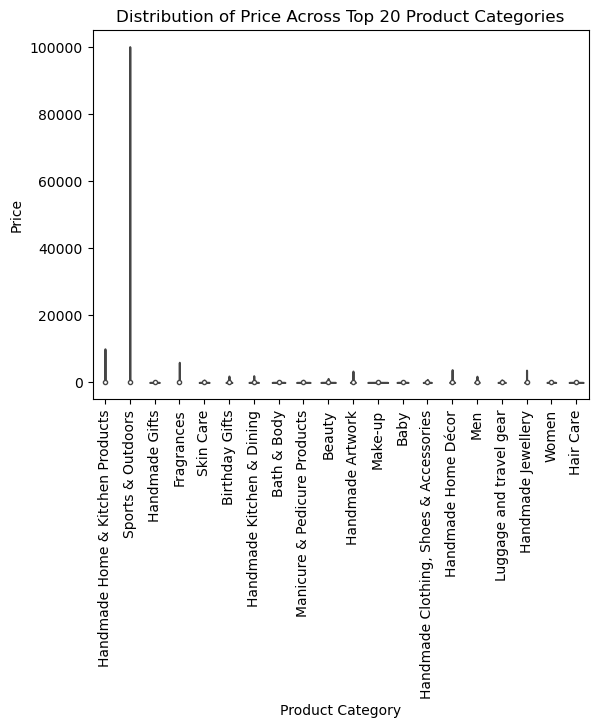

In [39]:
sns.violinplot(x='category', y='price', data=df_filtered)
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=90)

### 2. Bar Charts:

- Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
- Which product category commands the highest average price? Don't filter here by top categories.

<Axes: xlabel='category', ylabel='price'>

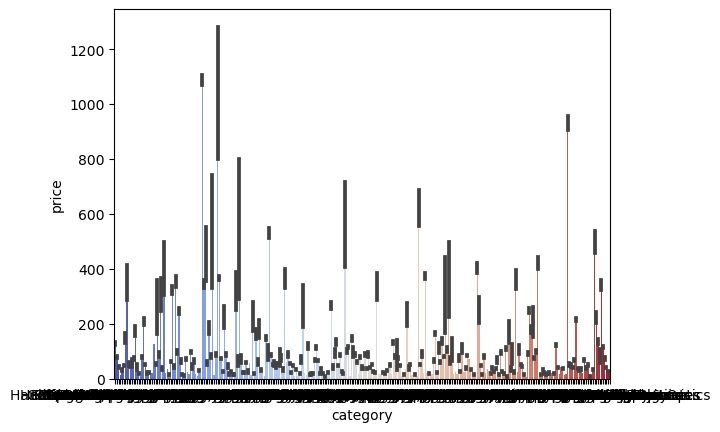

In [40]:
# Plotting a bar plot to visualize the average 'SalePrice' for each 'MSZoning' category, using the "coolwarm" color palette
sns.barplot(data=df, x='category', y='price', palette="coolwarm")

In [ ]:
# Filter out the top 10 categories based on count
top_categories = df['category'].value_counts().nlargest(10).index
df_filtered = df[df['category'].isin(top_categories)]

In [20]:
# Calculate the average price for each category
average_prices = df_filtered.groupby('category')['price'].mean().sort_values(ascending=False)

Text(0, 0.5, 'Average Price')

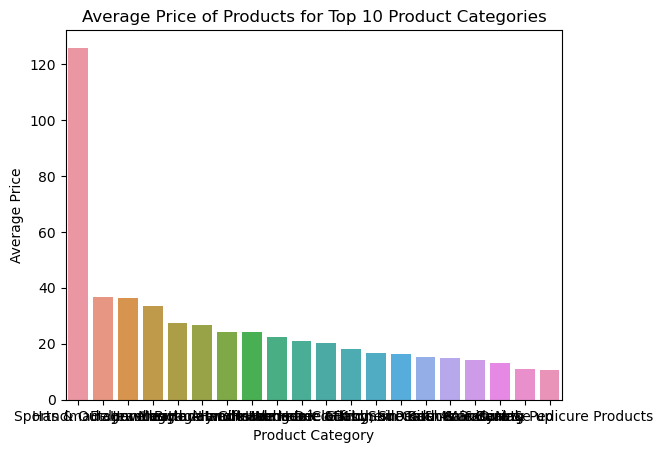

In [22]:
# Create the bar chart
sns.barplot(x=average_prices.index, y=average_prices.values)
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')

### 3. Box Plots:

- Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
- Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [25]:
# Filter out the top 10 categories based on count
top_categories = df['category'].value_counts().nlargest(10).index
df_filtered = df[df['category'].isin(top_categories)]

Text(0, 0.5, 'Product Rating')

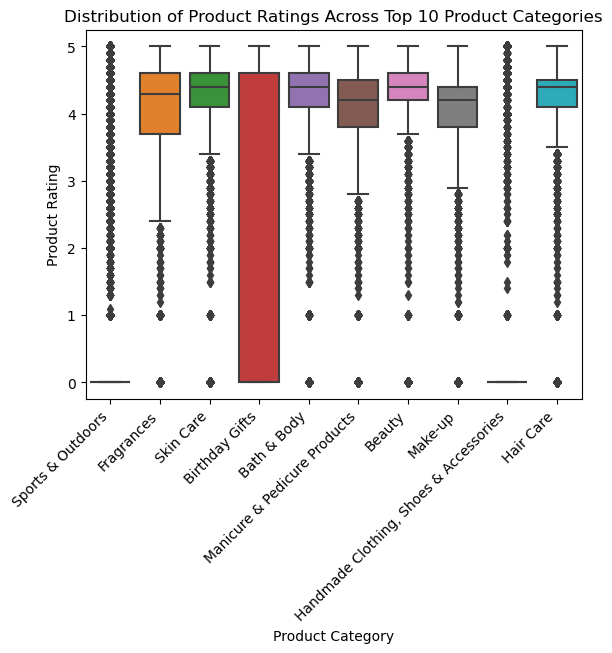

In [28]:
sns.boxplot(x='category', y='stars', data=df_filtered)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Product Ratings Across Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Product Rating')

## Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

### 1.Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

In [41]:
df_filtered = df[df['stars'] != 0]

In [45]:
# Calculating the Pearson correlation coefficient between 'price' and 'stars' columns
correlation = df_filtered['price'].corr(df_filtered['stars'], method='pearson')
correlation

-0.00491182300075083

In [43]:
# Calculating the Spearman rank correlation between 'price' and 'stars'
correlation = df_filtered['price'].corr(df_filtered['stars'], method='spearman')
correlation

0.020035042659558907

Given the small number provided, hard to say anything regarding a potential correlation batween price and rating

### 2.Visualizations:

- Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
- Use a correlation heatmap to visualize correlations between all numerical variables.
- Examine if product prices typically follow a normal distribution using a QQ plot.

Text(0, 0.5, 'Price')

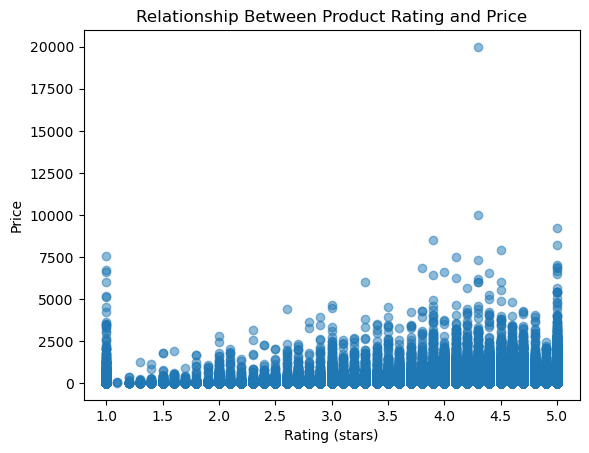

In [47]:
plt.scatter(df_filtered['stars'], df_filtered['price'], alpha=0.5)
plt.title('Relationship Between Product Rating and Price')
plt.xlabel('Rating (stars)')
plt.ylabel('Price')

--> No real correlation between price and product rating